# IMDB Notebook
## Dataset: imdb movie metadata
#### Dave Snowberger - 27 Mar 18

In [1]:
# Imports and dataset loading
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('data/movie_metadata.csv').drop_duplicates()
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [2]:
num_films = df.shape[0]

# P of a movie being over 90 min and 120 min, respectively
[df[df.duration > 90].shape[0] / num_films, df[df.duration > 120].shape[0] / num_films]

[0.8077230892356942, 0.21248499399759904]

In [3]:
# P of a movie being directed by Steven Spielberg
df[df.director_name=='Steven Spielberg'].shape[0] / num_films

0.005202080832332933

In [4]:
# P of a movie directed by Clint Eastwood grossing less than budget
df['net'] = df.gross - df.budget
df[df.director_name=='Clint Eastwood'][df.net < 0].shape[0] / df[df.director_name=='Clint Eastwood'].shape[0]

0.35

In [5]:
# P of a movie being profitable
df[df.net > 0].shape[0] / num_films

0.40656262505002

In [6]:
# P of a movie grossing more than the average gross
df[df['gross'] > df['gross'].mean()].shape[0] / num_films

0.26330532212885155

In [7]:
# fp = imdb_score >= 6.0 && net < 0 
# fn = imdb_score < 6.0 && net >= 0
# P of a false positive and false negative, respectively
[df[df['imdb_score'] >= 6][df['net'] < 0].shape[0] / num_films,df[df['imdb_score'] < 6][df['net'] >= 0].shape[0] / num_films]

[0.24289715886354543, 0.09223689475790316]

In [8]:
# Examples of fp:
df[df['imdb_score'] >= 6][df['net'] < 0][['movie_title','net','imdb_score']].head(3)

,movie_title,net,imdb_score
2,Spectre,-44925825.0,6.8
5,John Carter,-190641321.0,6.6
7,Tangled,-59192738.0,7.8


In [9]:
# Examples of np:
df[df['imdb_score'] < 6][df['net'] >= 0][['movie_title','net','imdb_score']].head(3)

,movie_title,net,imdb_score
37,Transformers: Age of Extinction,35428137.0,5.7
122,Night at the Museum: Battle of the Smithsonian,27243721.0,5.9
174,The Twilight Saga: Breaking Dawn - Part 2,172298923.0,5.5


In [10]:
# Tom Hanks film gross, Harrison Ford film gross, respectively:
# Hanks wins, yo.
[ df[(df.actor_1_name == 'Tom Hanks') | (df.actor_2_name == 'Tom Hanks') | (df.actor_3_name == 'Tom Hanks')]['gross'].sum(),\
df[(df.actor_1_name == 'Harrison Ford') | (df.actor_2_name == 'Harrison Ford') | (df.actor_3_name == 'Harrison Ford')]['gross'].sum()]

[3612647243.0, 3479593335.0]

In [11]:
# Tom Hanks avg rating, Harrison Ford avg rating, respectively:
# Hanks wins agaaaaaain oh snap.
[ df[(df.actor_1_name == 'Tom Hanks') | (df.actor_2_name == 'Tom Hanks') | (df.actor_3_name == 'Tom Hanks')]['imdb_score'].mean(),\
df[(df.actor_1_name == 'Harrison Ford') | (df.actor_2_name == 'Harrison Ford') | (df.actor_3_name == 'Harrison Ford')]['imdb_score'].mean()]

[7.3999999999999995, 7.075862068965518]

In [12]:
# P of a movie length being in interval [70,90]
df[df.duration <= 90][df.duration >= 70].shape[0] / num_films

0.1644657863145258

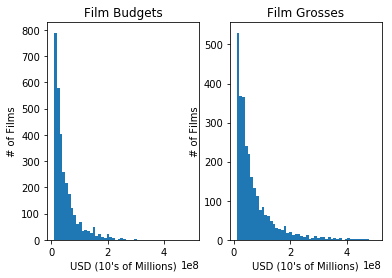

In [13]:
budgets = df[df.budget.notnull()]['budget']
grosses = df[df.gross.notnull()]['gross']

# Distribution of movie budgets
plt.subplot(121)
plt.title('Film Budgets')
plt.xlabel('USD (10\'s of Millions)')
plt.ylabel('# of Films')
plt.hist(budgets, bins=50, range=(10000000,500000000))

# Distribution of movie grosses
plt.subplot(122)
plt.title('Film Grosses')
plt.xlabel('USD (10\'s of Millions)')
plt.ylabel('# of Films')
plt.hist(grosses, bins=50, range=(10000000,500000000))
plt.show()

In [14]:
# Separate Genres
genres = set(df['genres'].str.split('|').sum())
for genre in genres:
        df[genre] = 0
        df[genre][df.genres.str.contains(genre)] = genre

df.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,Animation,Sci-Fi,Film-Noir,Biography,News,Musical,Adventure,Mystery,Thriller,Sport
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0,Sci-Fi,0,0,0,0,Adventure,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,0,0,0,0,0,0,Adventure,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,0,0,0,0,0,0,Adventure,0,Thriller,0


In [15]:
# Calculate average net by genre
sum_of_nets = []
for genre in genres:
    sum_of_nets.append((genre,df[df[genre] == genre]['net'].mean()))

genre_df = pd.DataFrame(sum_of_nets)
genre_df.sort_values(by=1, ascending = False).head(5)

,0,1
13,Family,2.174737e+07
8,Fantasy,1.689471e+07
5,Music,1.527141e+07
21,Musical,1.397017e+07
22,Adventure,1.326438e+07


<BarContainer object of 26 artists>

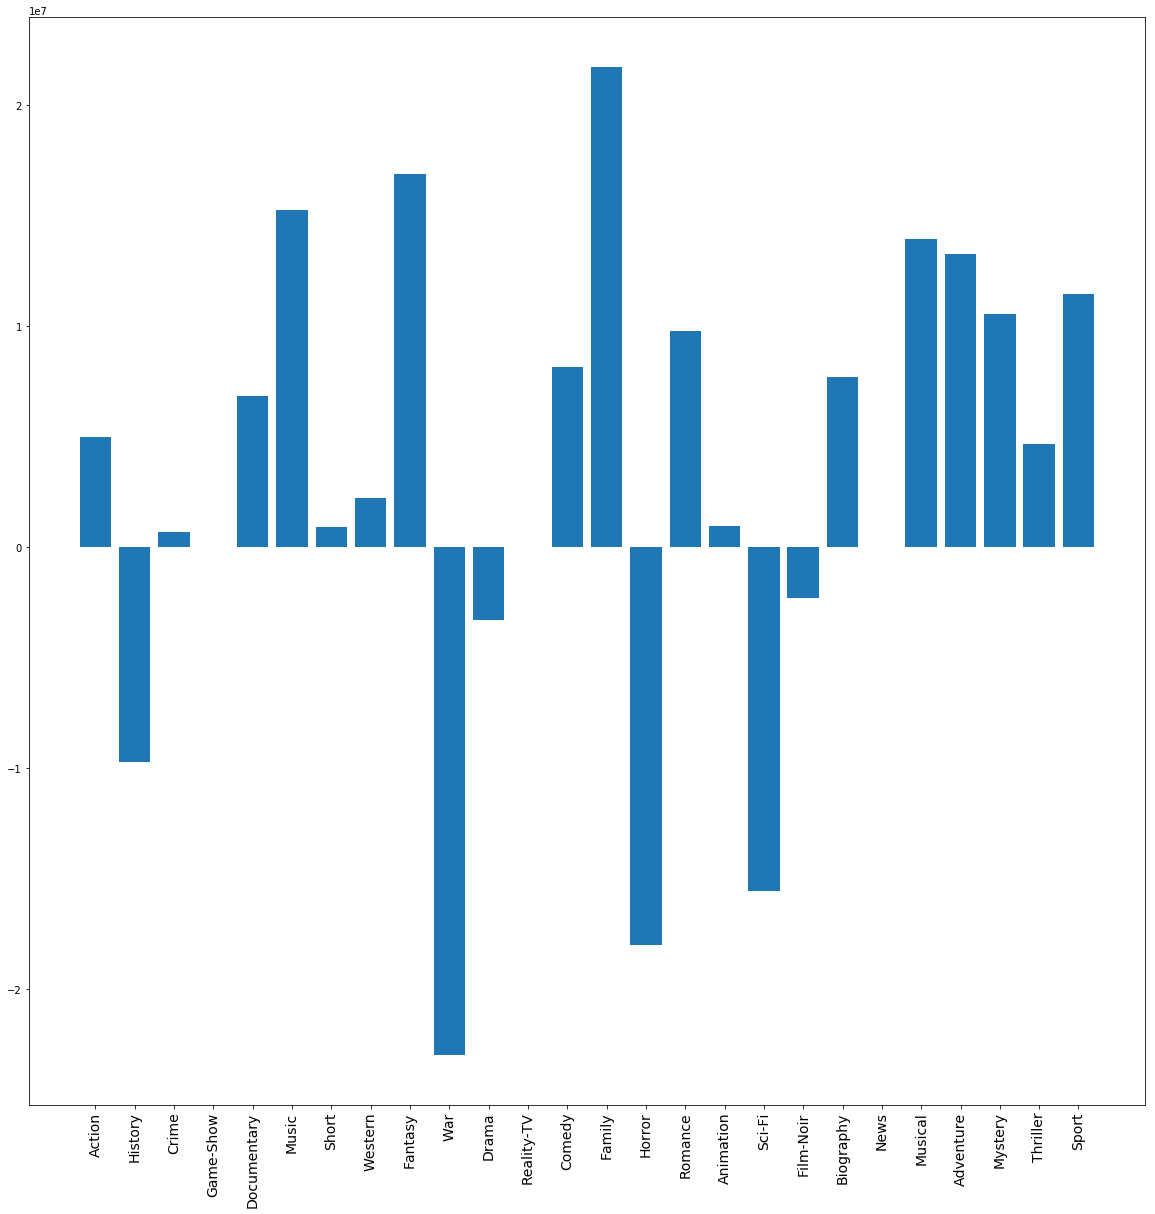

In [16]:
# Average net by genre plot 
plt.figure(figsize=(20,20))
plt.xticks(rotation='vertical',fontsize=14)
plt.bar(genre_df[0],genre_df[1])


<BarContainer object of 2 artists>

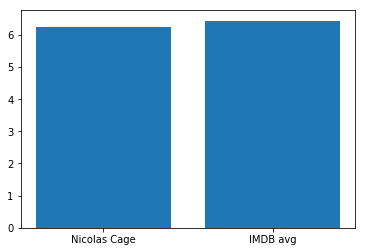

In [17]:
# Difference between the average imdb score and Cage's imdb score
# He's lower rated - but not by that much, eh?
a = 'Nicolas Cage'
cage_score = df[(df.actor_1_name == a) | (df.actor_2_name == a) | (df.actor_3_name == a)]['imdb_score'].mean()

plt.bar([a, 'IMDB avg'],[cage_score, df.imdb_score.mean()])

[Text(0,0.5,'Combined Annual Gross (Billions)'), Text(0.5,0,'Years')]

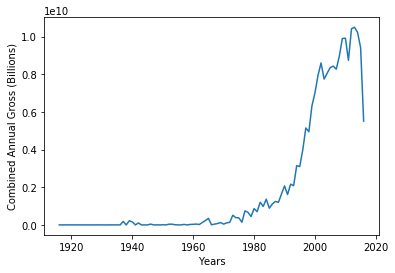

In [18]:
# Gross by year - Seems to follow a broader trend...
# I don't see anything too terribly anomalous.

ax = df['gross'].groupby(df.title_year).sum().plot(kind='line')
ax.set(xlabel='Years',ylabel='Combined Annual Gross (Billions)')